In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df = data.copy()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Data Preparation



##Data cleaning

In [ ]:
#удаляем признаки где более 20 процентов пропусков
df_to_delete = pd.DataFrame(df.isna().sum() / len(df)*100, columns = ['Procent_NAN'])
df_to_delete =  df_to_delete[df_to_delete['Procent_NAN']>20]
df_to_delete

,Procent_NAN
Alley,93.767123
FireplaceQu,47.260274
PoolQC,99.520548
Fence,80.753425
MiscFeature,96.301370


In [ ]:
df.drop(columns = df_to_delete.index.tolist())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
#заполняем пропуски в категориальных переменных заменяем самыми популярными значениями, а в количественных медианой

In [ ]:
si = SimpleImputer(strategy='median')
df[df.select_dtypes(include=['float64', 'int64']).columns.tolist()] = si.fit_transform(df.select_dtypes(include=['float64', 'int64']))

In [ ]:
df.select_dtypes(include=['float64', 'int64']).isna().sum().value_counts()

0    38
dtype: int64

In [ ]:
si1 = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object']).columns.tolist()] = si1.fit_transform(df.select_dtypes(include=['object']))

In [ ]:
df.select_dtypes(include=['object']).isna().sum().value_counts()

0    43
dtype: int64

In [ ]:
df.MSSubClass.median()

50.0

In [ ]:
#работа с выбросами

In [ ]:
def get_outlier(df):
  q75 = df.quantile(0.75)
  q25 = df.quantile(0.25)
  iter_q = q75 - q25
  b2 = iter_q * 1.5 + q75
  b1 = q25 - iter_q * 1.5 
  return b1, b2

In [ ]:
lst = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
dct_outlier = {}
for item in lst:
  b1, b2 = get_outlier(df[item])
  procent_out = (len(df[df[item]>b2]) + len(df[df[item]<b1])) / len(df) * 100
  dct_outlier[item] = procent_out

In [ ]:
df_outlier= pd.DataFrame(columns=['feateures_name', 'procent_out'])
for item in lst:
  b1, b2 = get_outlier(df[item])
  procent_out = (len(df[df[item]>b2]) + len(df[df[item]<b1])) / len(df) * 100
  df_outlier = df_outlier.append({'features_name':item, 'procent_out': procent_out}, ignore_index=True) 

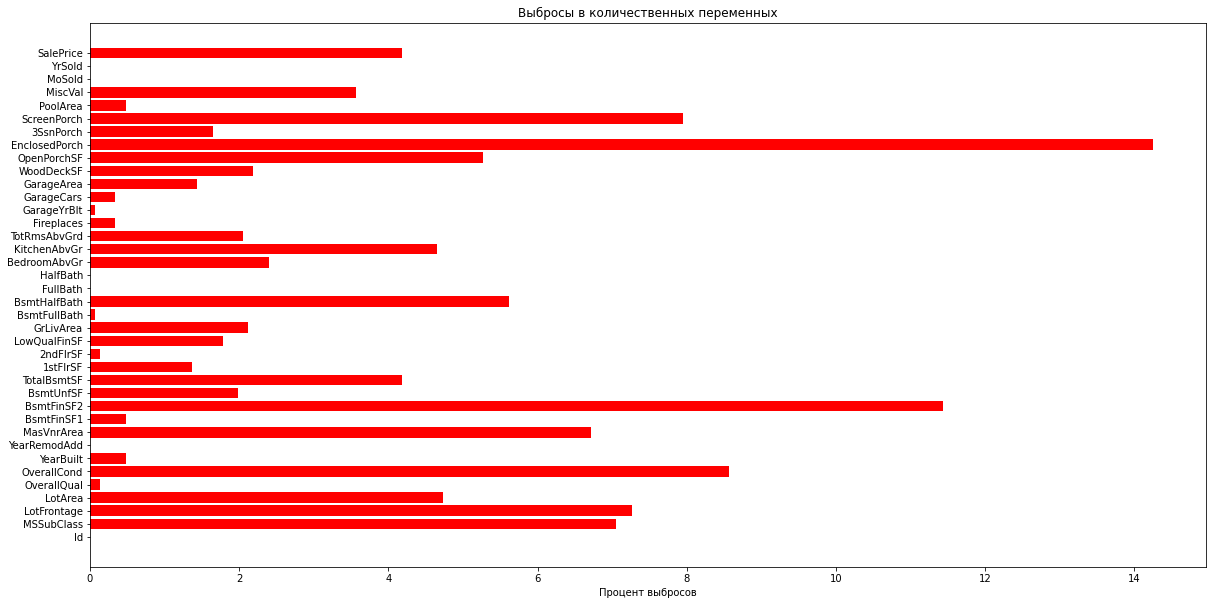

In [ ]:
plt.figure(figsize=(20,10))
plt.barh(df_outlier['features_name'], df_outlier['procent_out'], color='r')
plt.xlabel('Процент выбросов')
plt.title('Выбросы в количественных переменных');

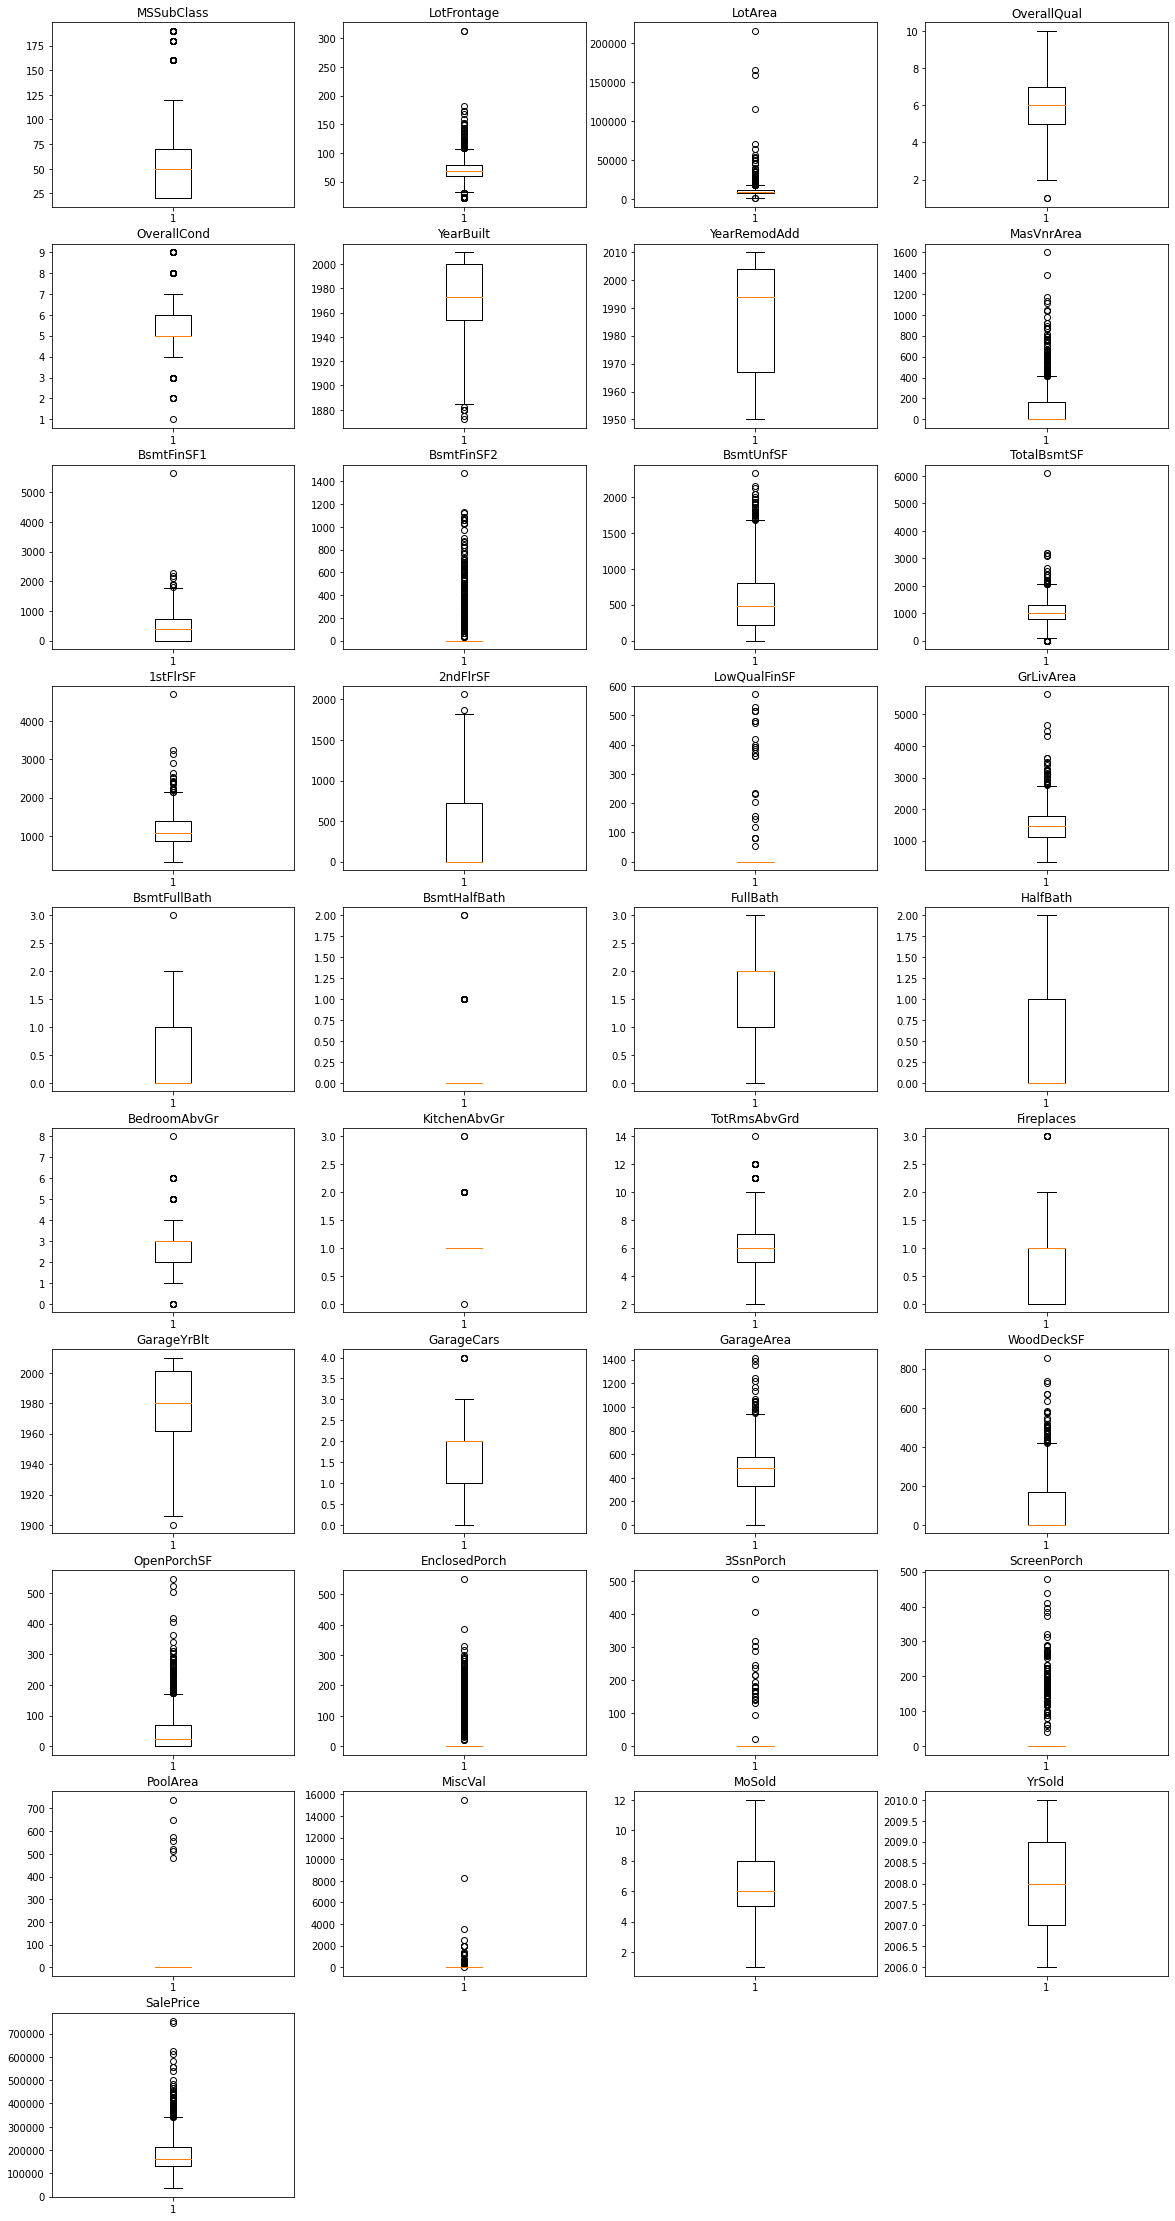

In [ ]:
plt.figure(figsize=(20, 40))
for i in range(1, len(lst)):
  plt.subplot(10, 4, i)
  plt.boxplot(df[lst[i]])
  plt.title(lst[i])
plt.show();

In [ ]:
#удаляем выбросы
def delete_outlier(df, b1, b2):
  df = df.apply(lambda x: b1 if x < b1 else x)
  df = df.apply(lambda x: b2 if x > b2 else x)
  return df

In [ ]:
to_drop_out = lst.copy()

In [ ]:
not_delete_out = ['SalePrice','BsmtFinSF2', 'MiscVal','ScreenPorch','PoolArea', 'EnclosedPorch', '3SsnPorch', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF']
for i in range(len(not_delete_out)):
  to_drop_out.remove(not_delete_out[i])

In [ ]:
for item in to_drop_out:
  b1, b2 = get_outlier(df[item])
  df[item] = delete_outlier(df[item], b1, b2)


##Data visualisation

In [ ]:
numerical = lst

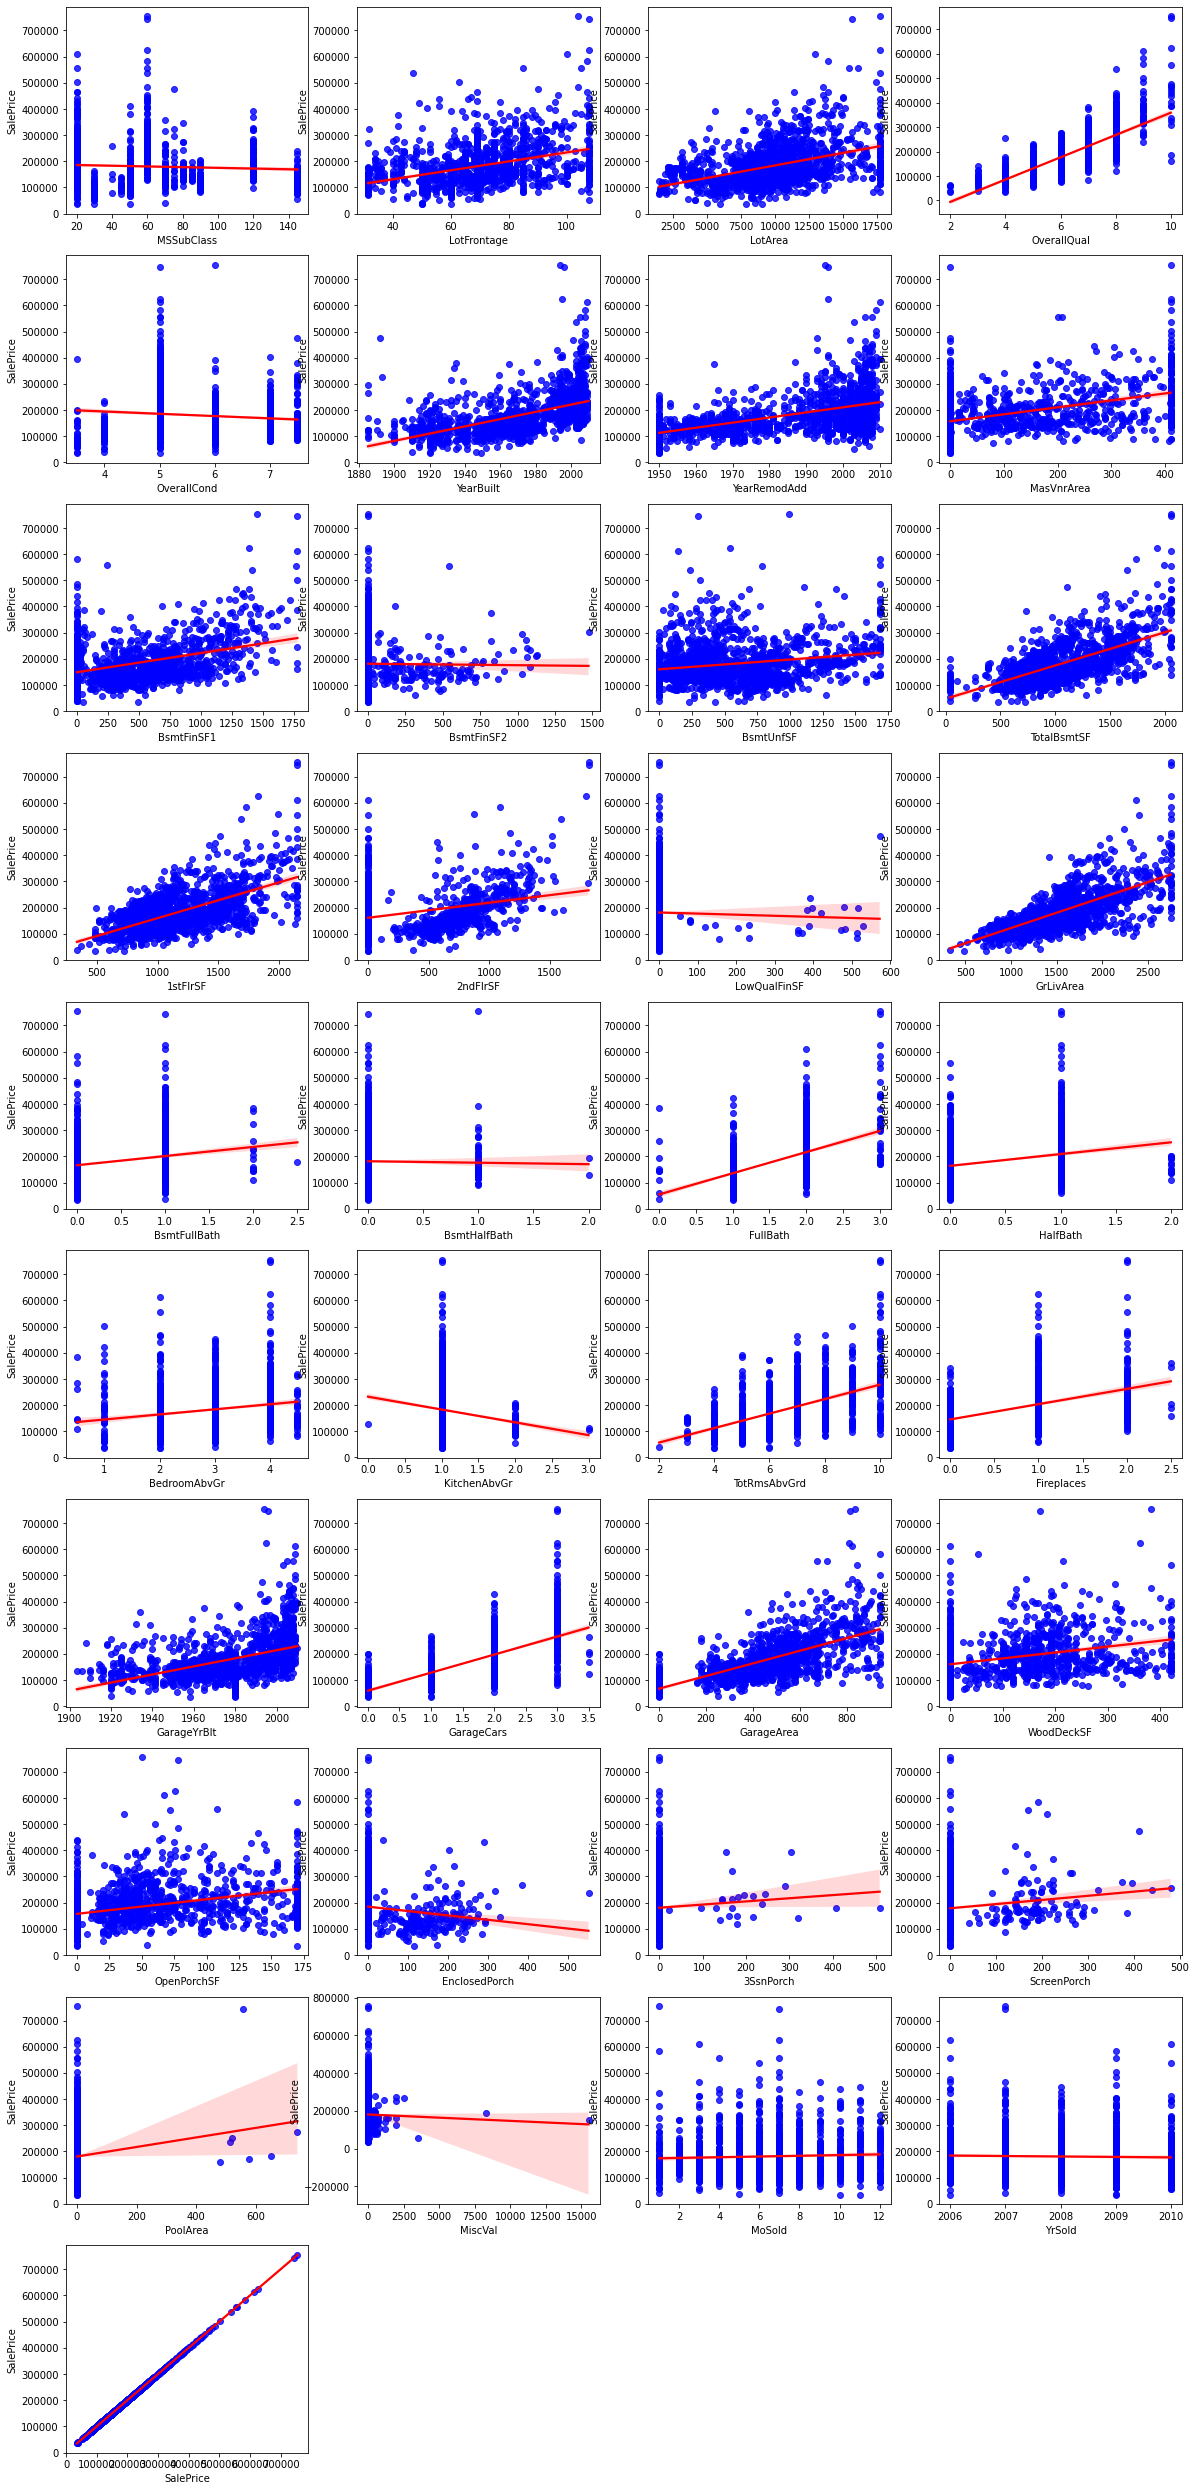

In [ ]:
#Визуализация количественных переменных
plt.figure(figsize=(20, 45))
for i in range(1, len(numerical)):
  plt.subplot(10, 4, i)
  sns.regplot(x=df[numerical[i]], y= "SalePrice",\
              data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show();

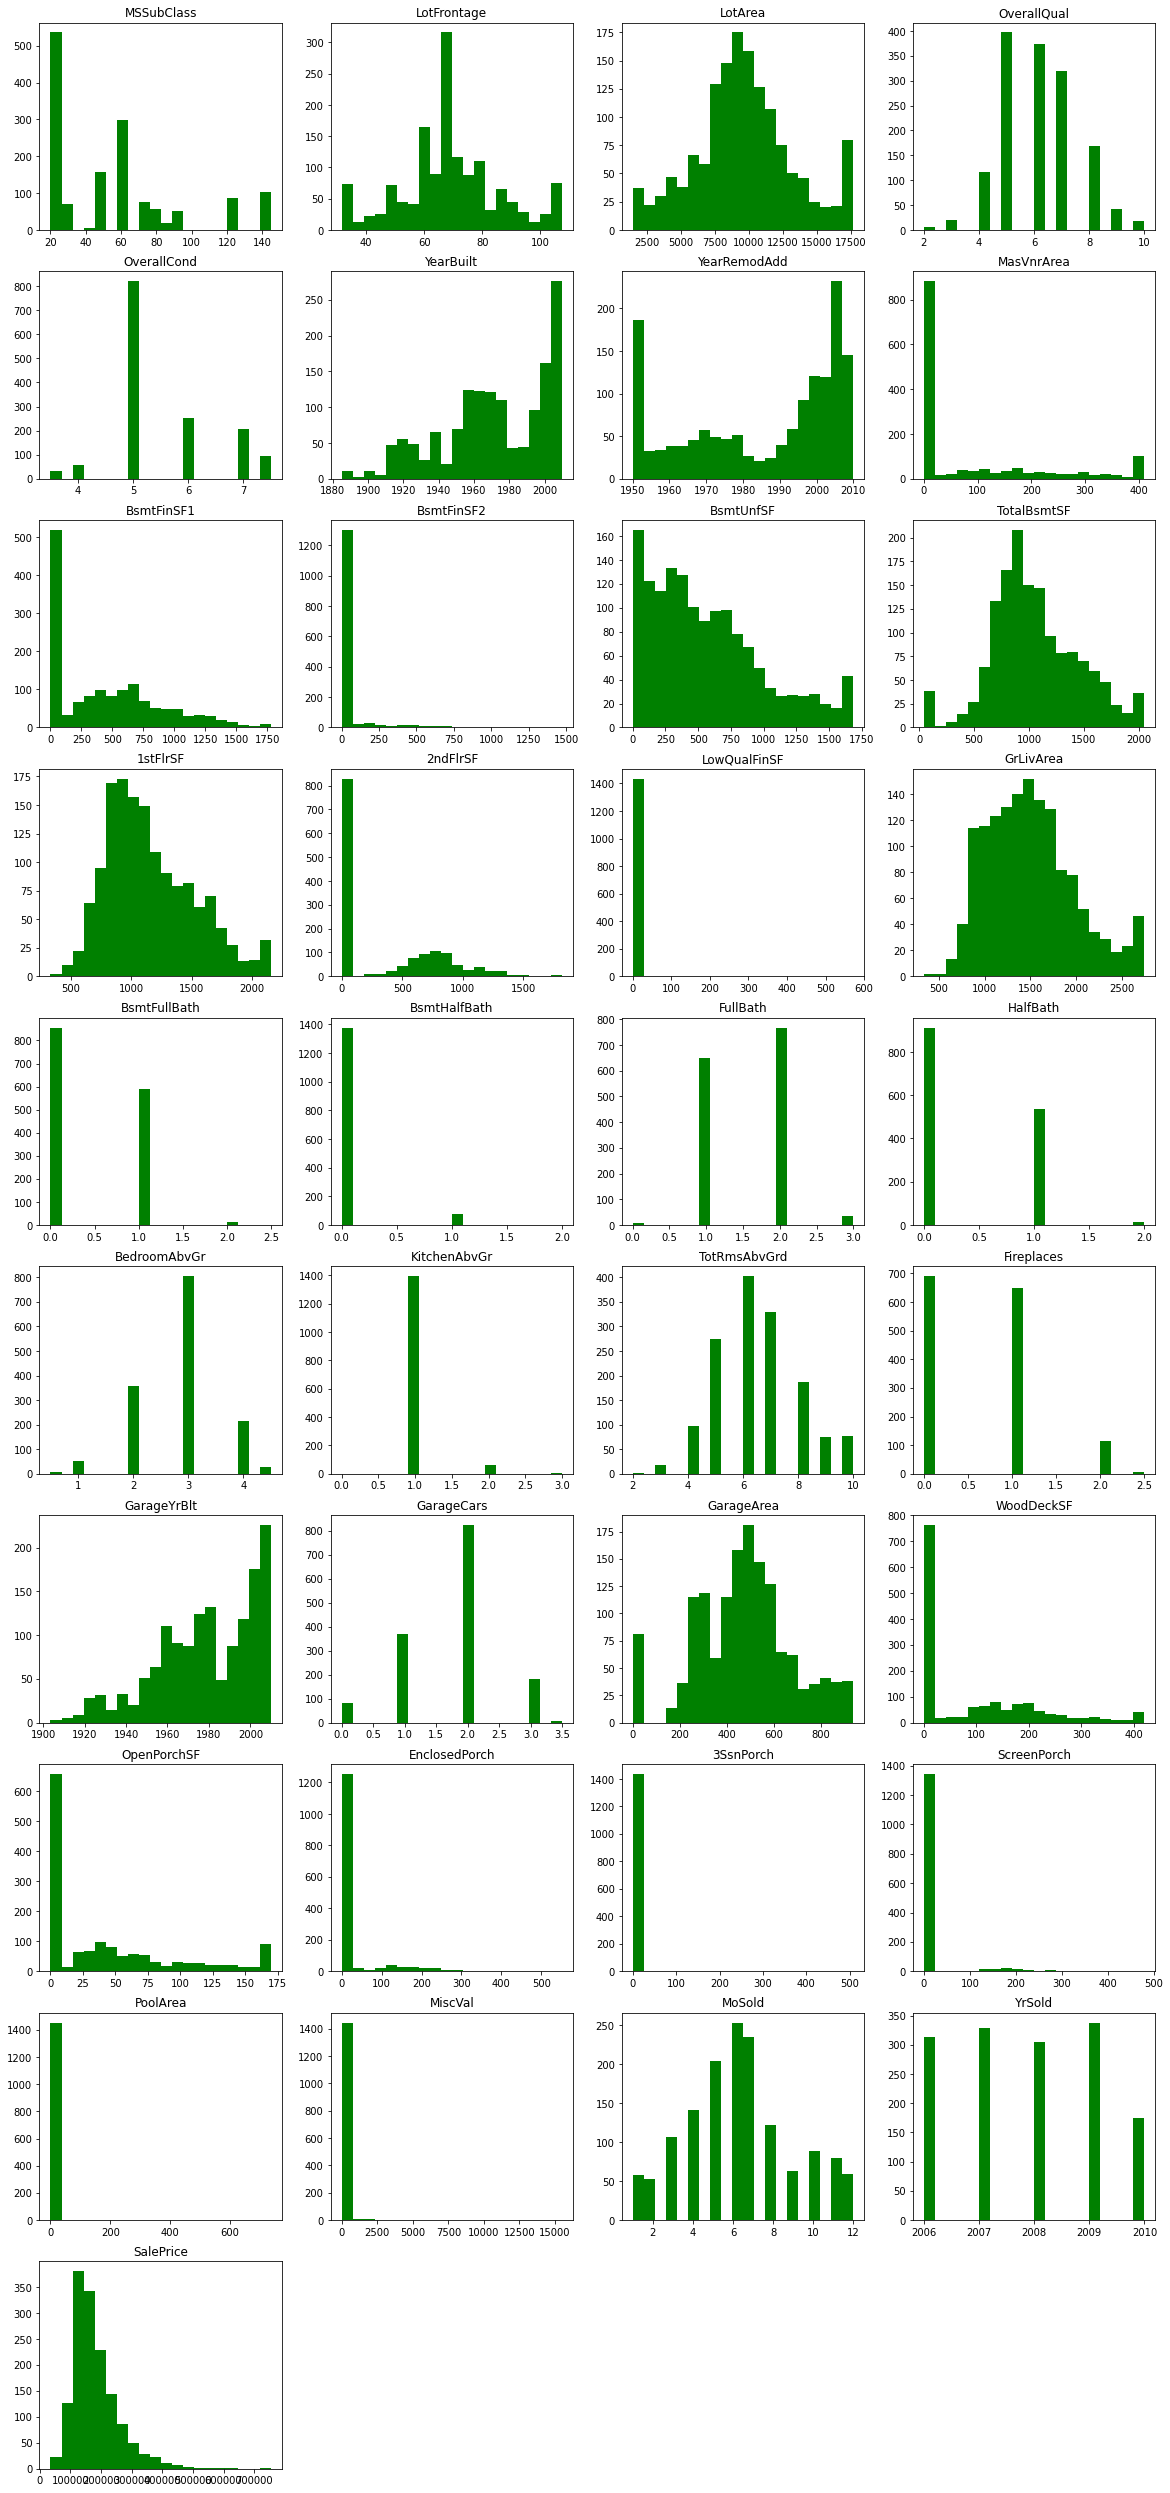

In [ ]:
plt.figure(figsize=(20, 45))
for i in range(1, len(lst)):
  plt.subplot(10, 4, i)
  plt.hist(df[numerical[i]], bins = 20, color = 'green' )
  plt.title(numerical[i])
plt.show();

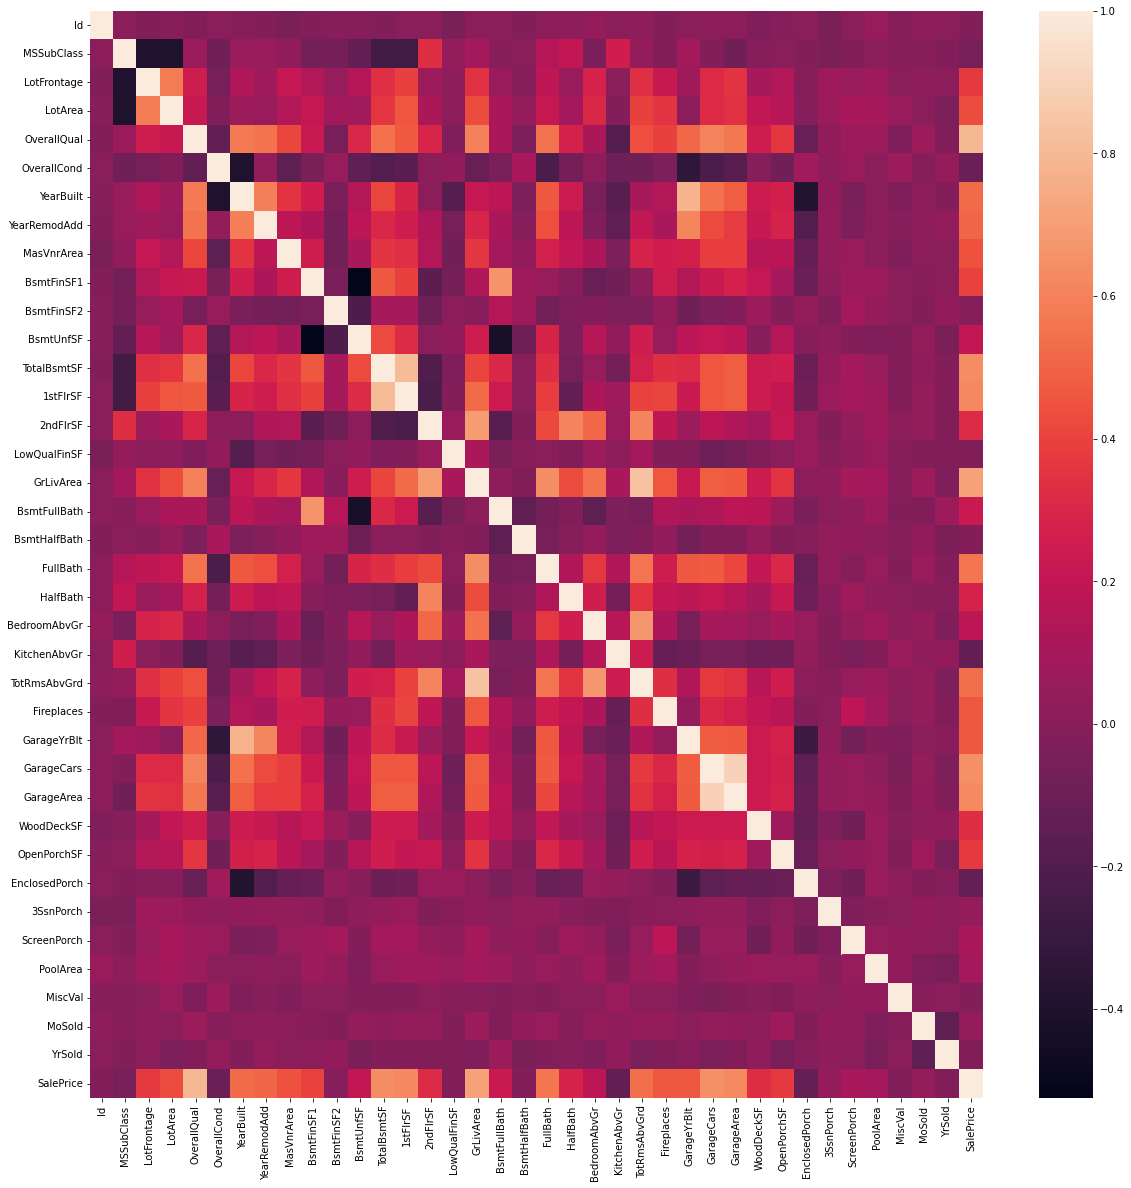

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical].corr())

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

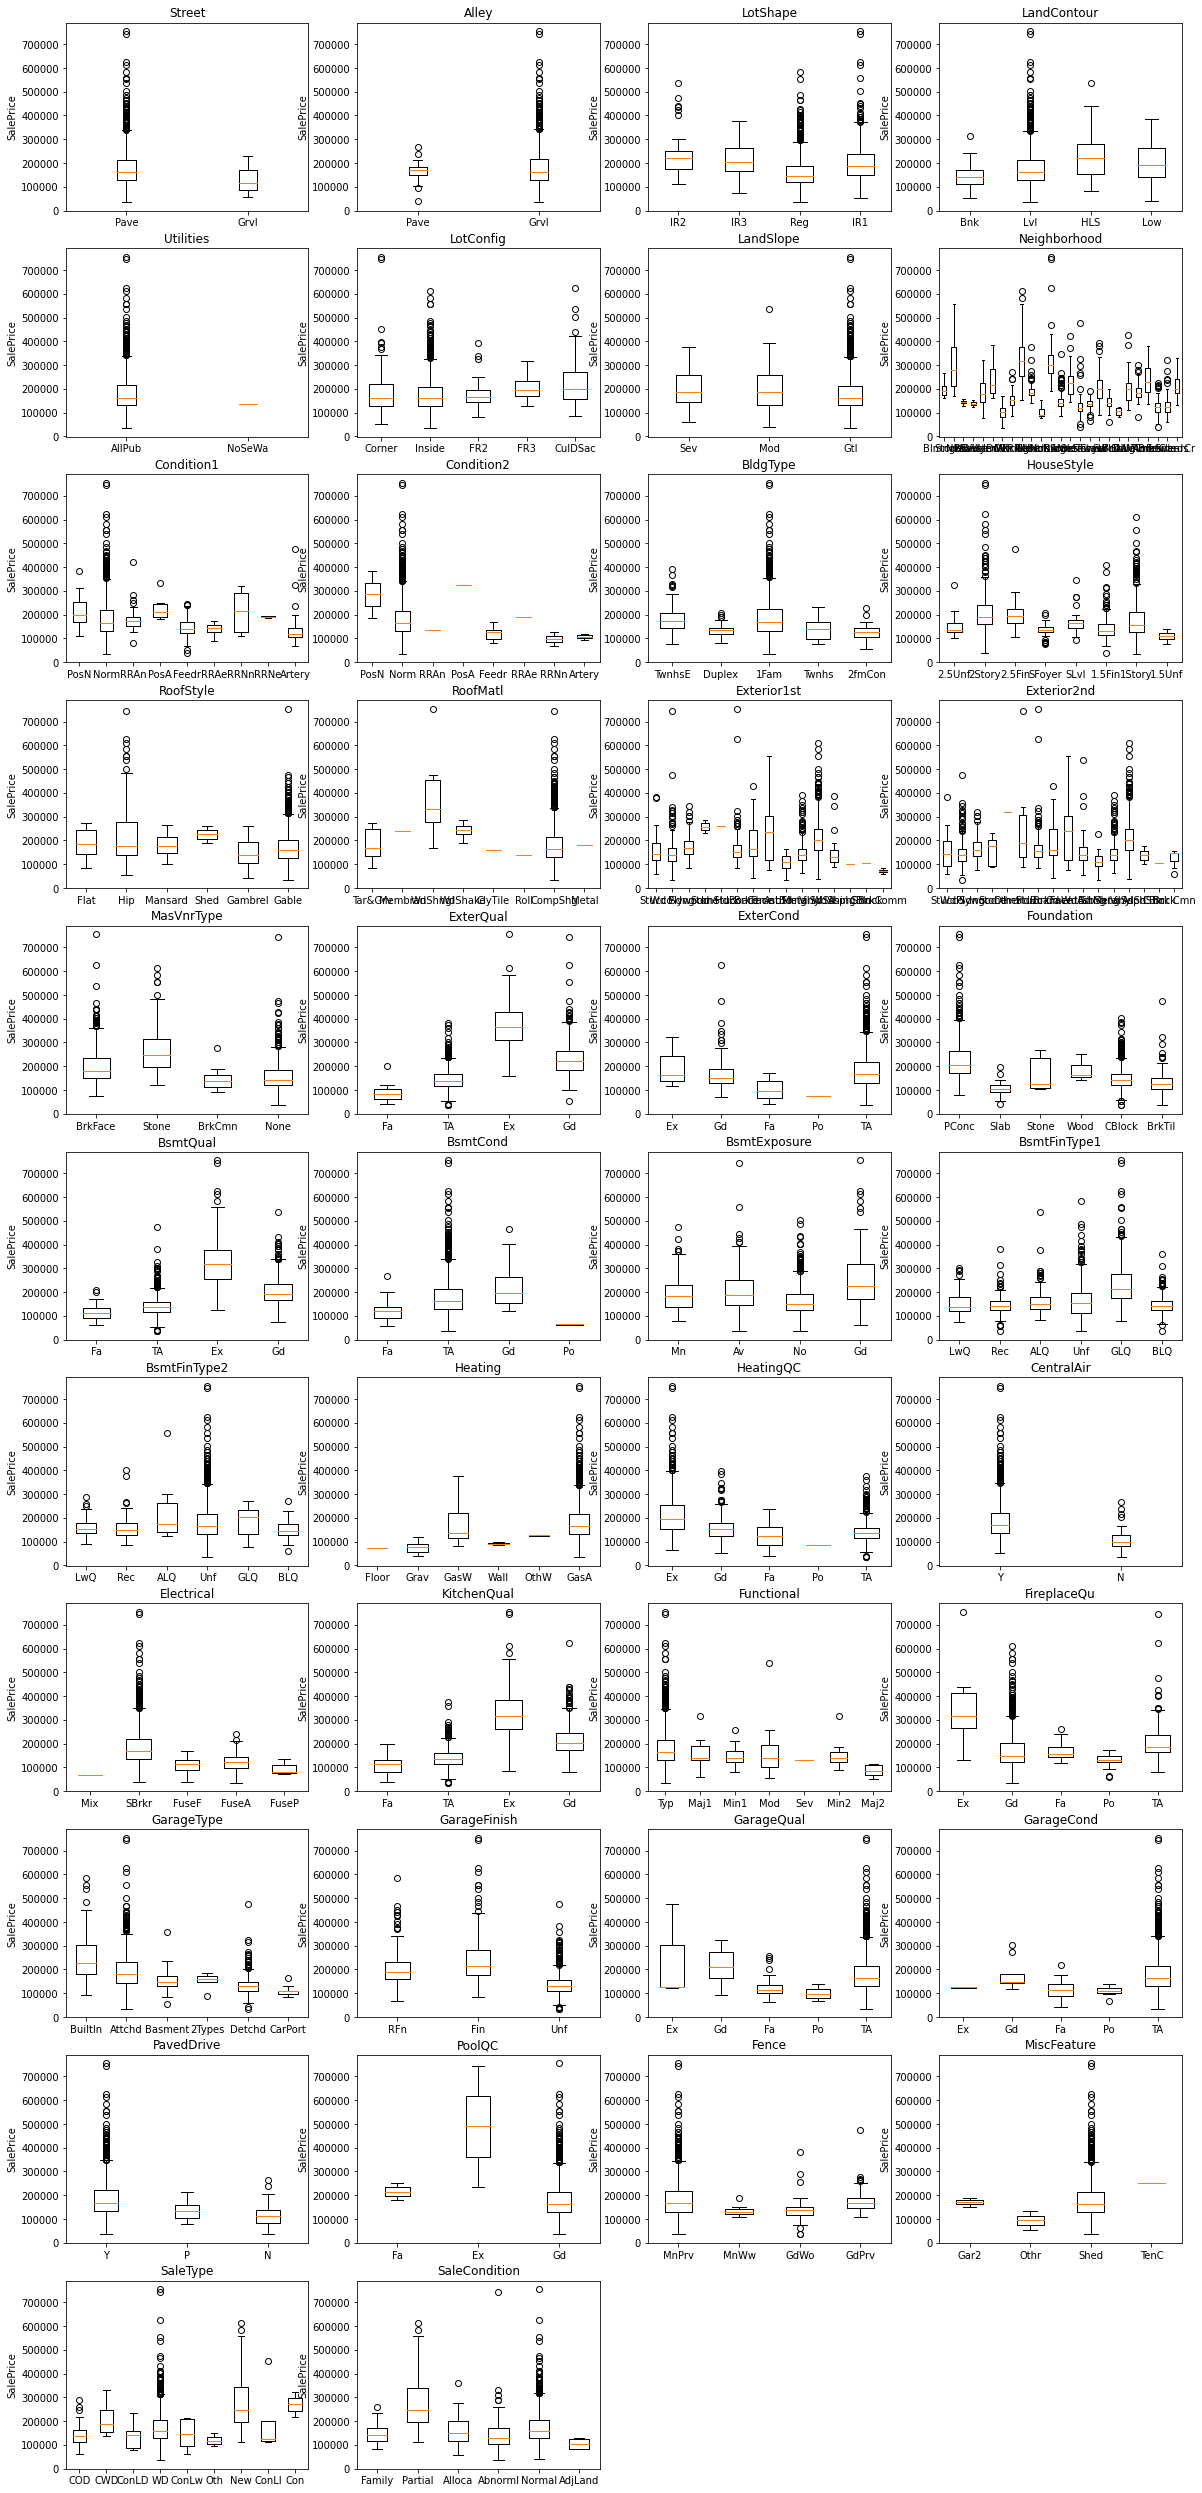

In [ ]:
plt.figure(figsize=(20, 45))
categorical = df.select_dtypes(include=['object']).columns.tolist()
for i in range(1,len(categorical)):
  values = list(set(df[categorical[i]].values.tolist()))
  to_viz = []
  for j in range(len(values)):
    l = df[df[categorical[i]] == values[j]]['SalePrice'].tolist()
    to_viz.append(l)
  plt.subplot(11, 4, i)
  plt.boxplot(to_viz, labels = values)
  plt.title(categorical[i])
  plt.ylabel('SalePrice')
plt.show();

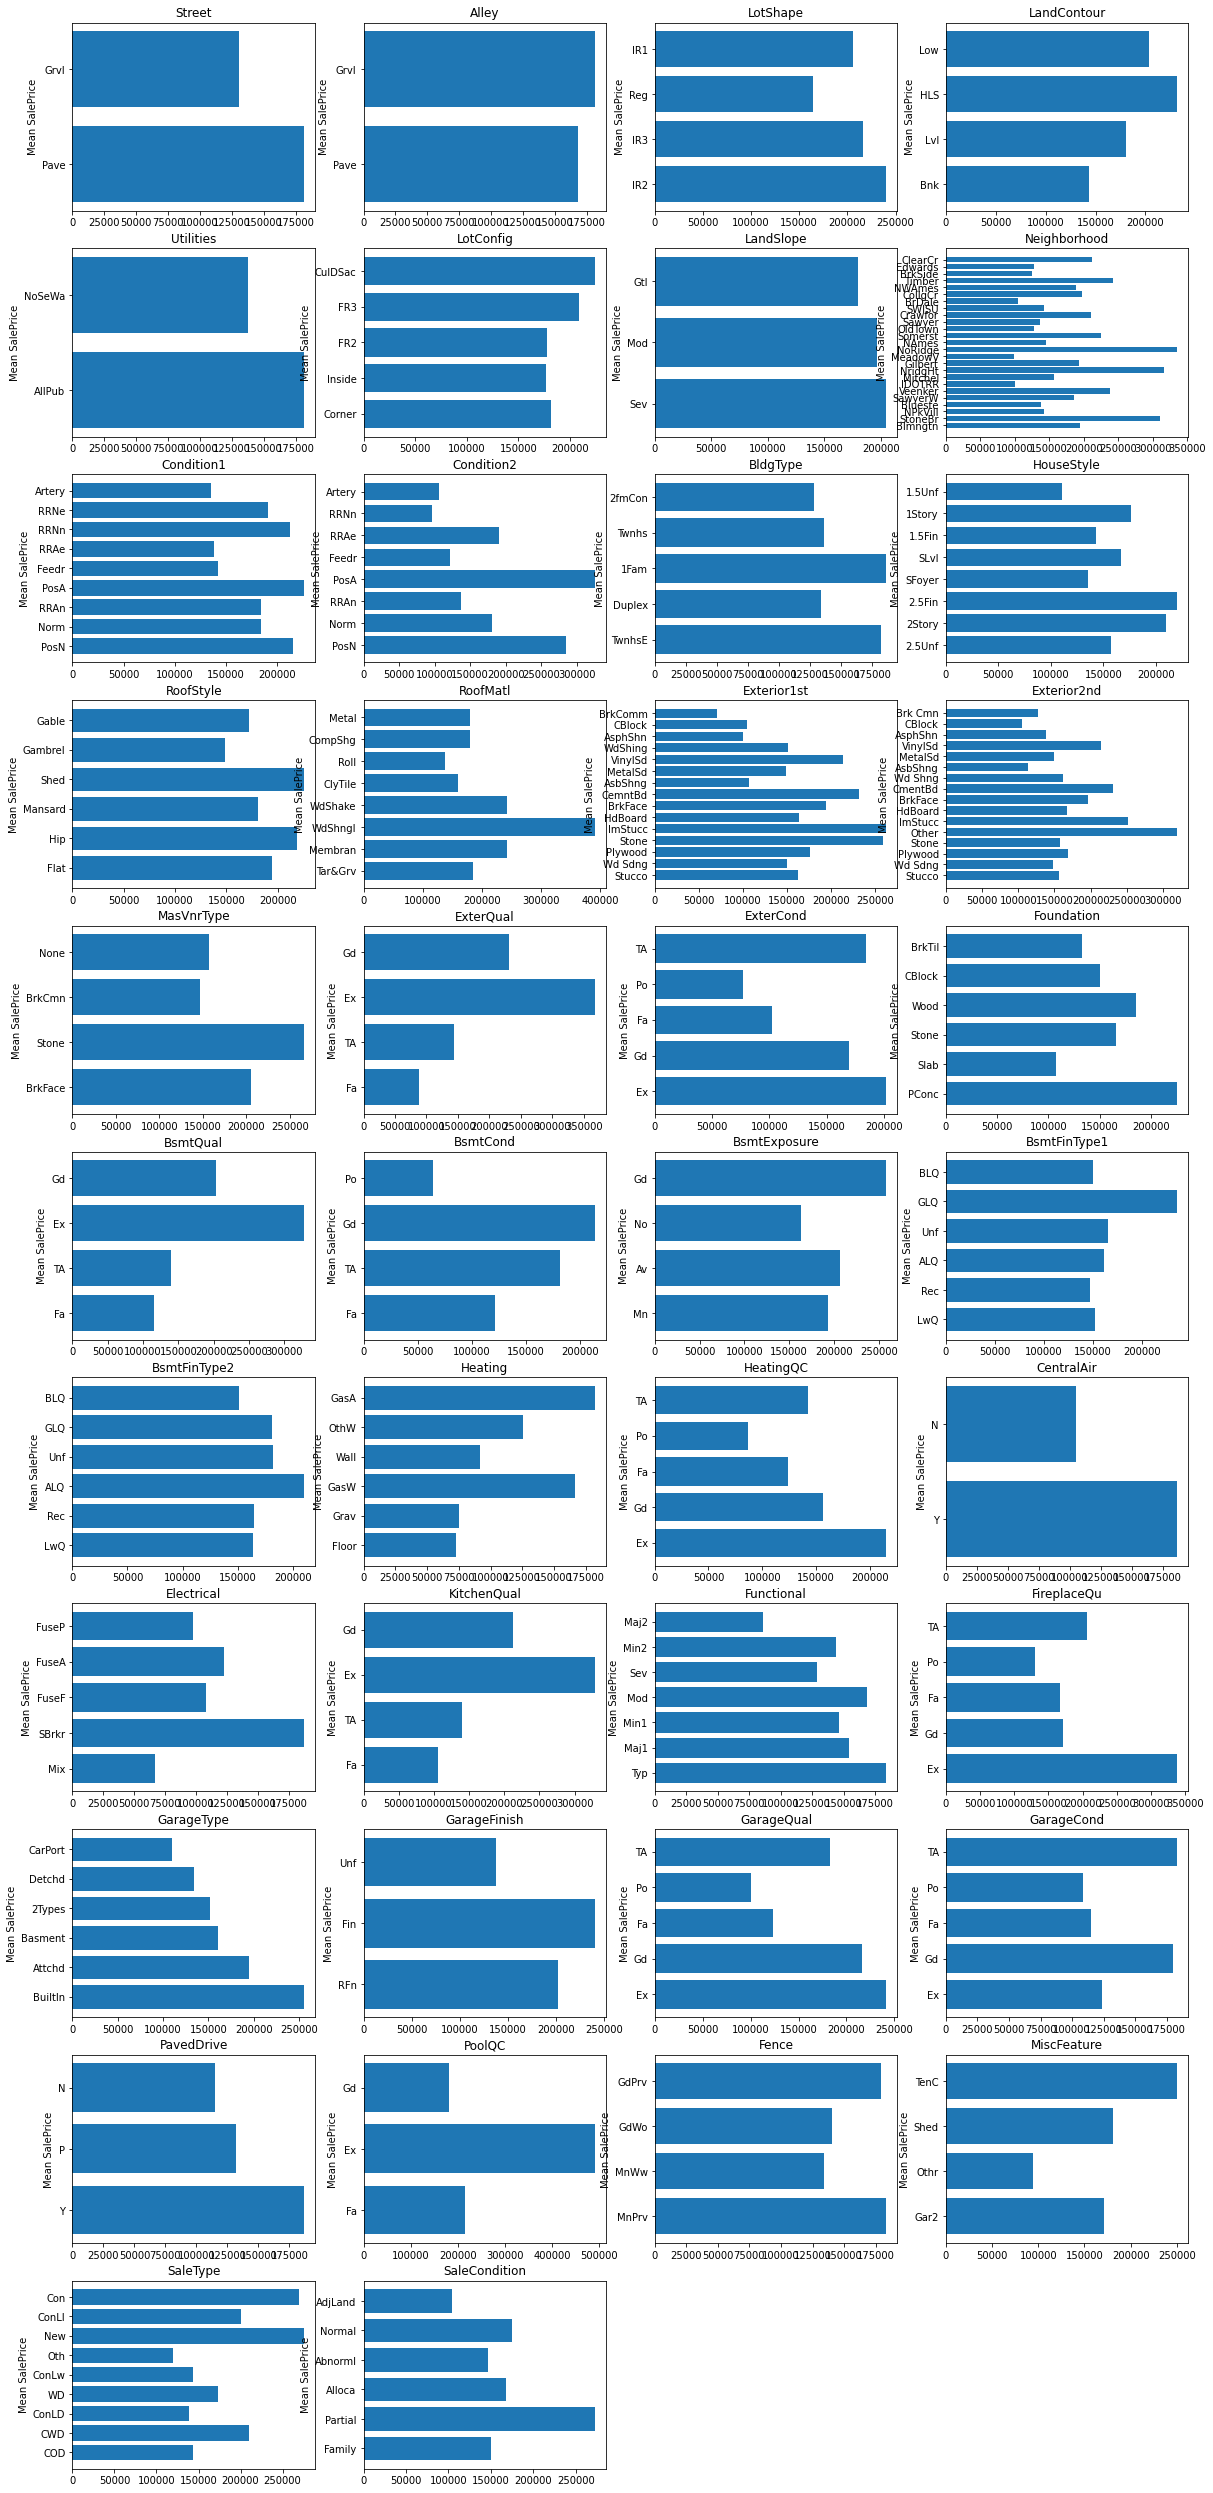

In [ ]:
plt.figure(figsize=(20, 45))
for i in range(1,len(categorical)):
  values = list(set(df[categorical[i]].values.tolist()))
  to_viz = []
  for j in range(len(values)):
    l = df[df[categorical[i]] == values[j]]['SalePrice'].mean()
    to_viz.append(l)
  plt.subplot(11, 4, i)
  plt.barh(values, to_viz)
  plt.title(categorical[i])
  plt.ylabel('Mean SalePrice')
plt.show();

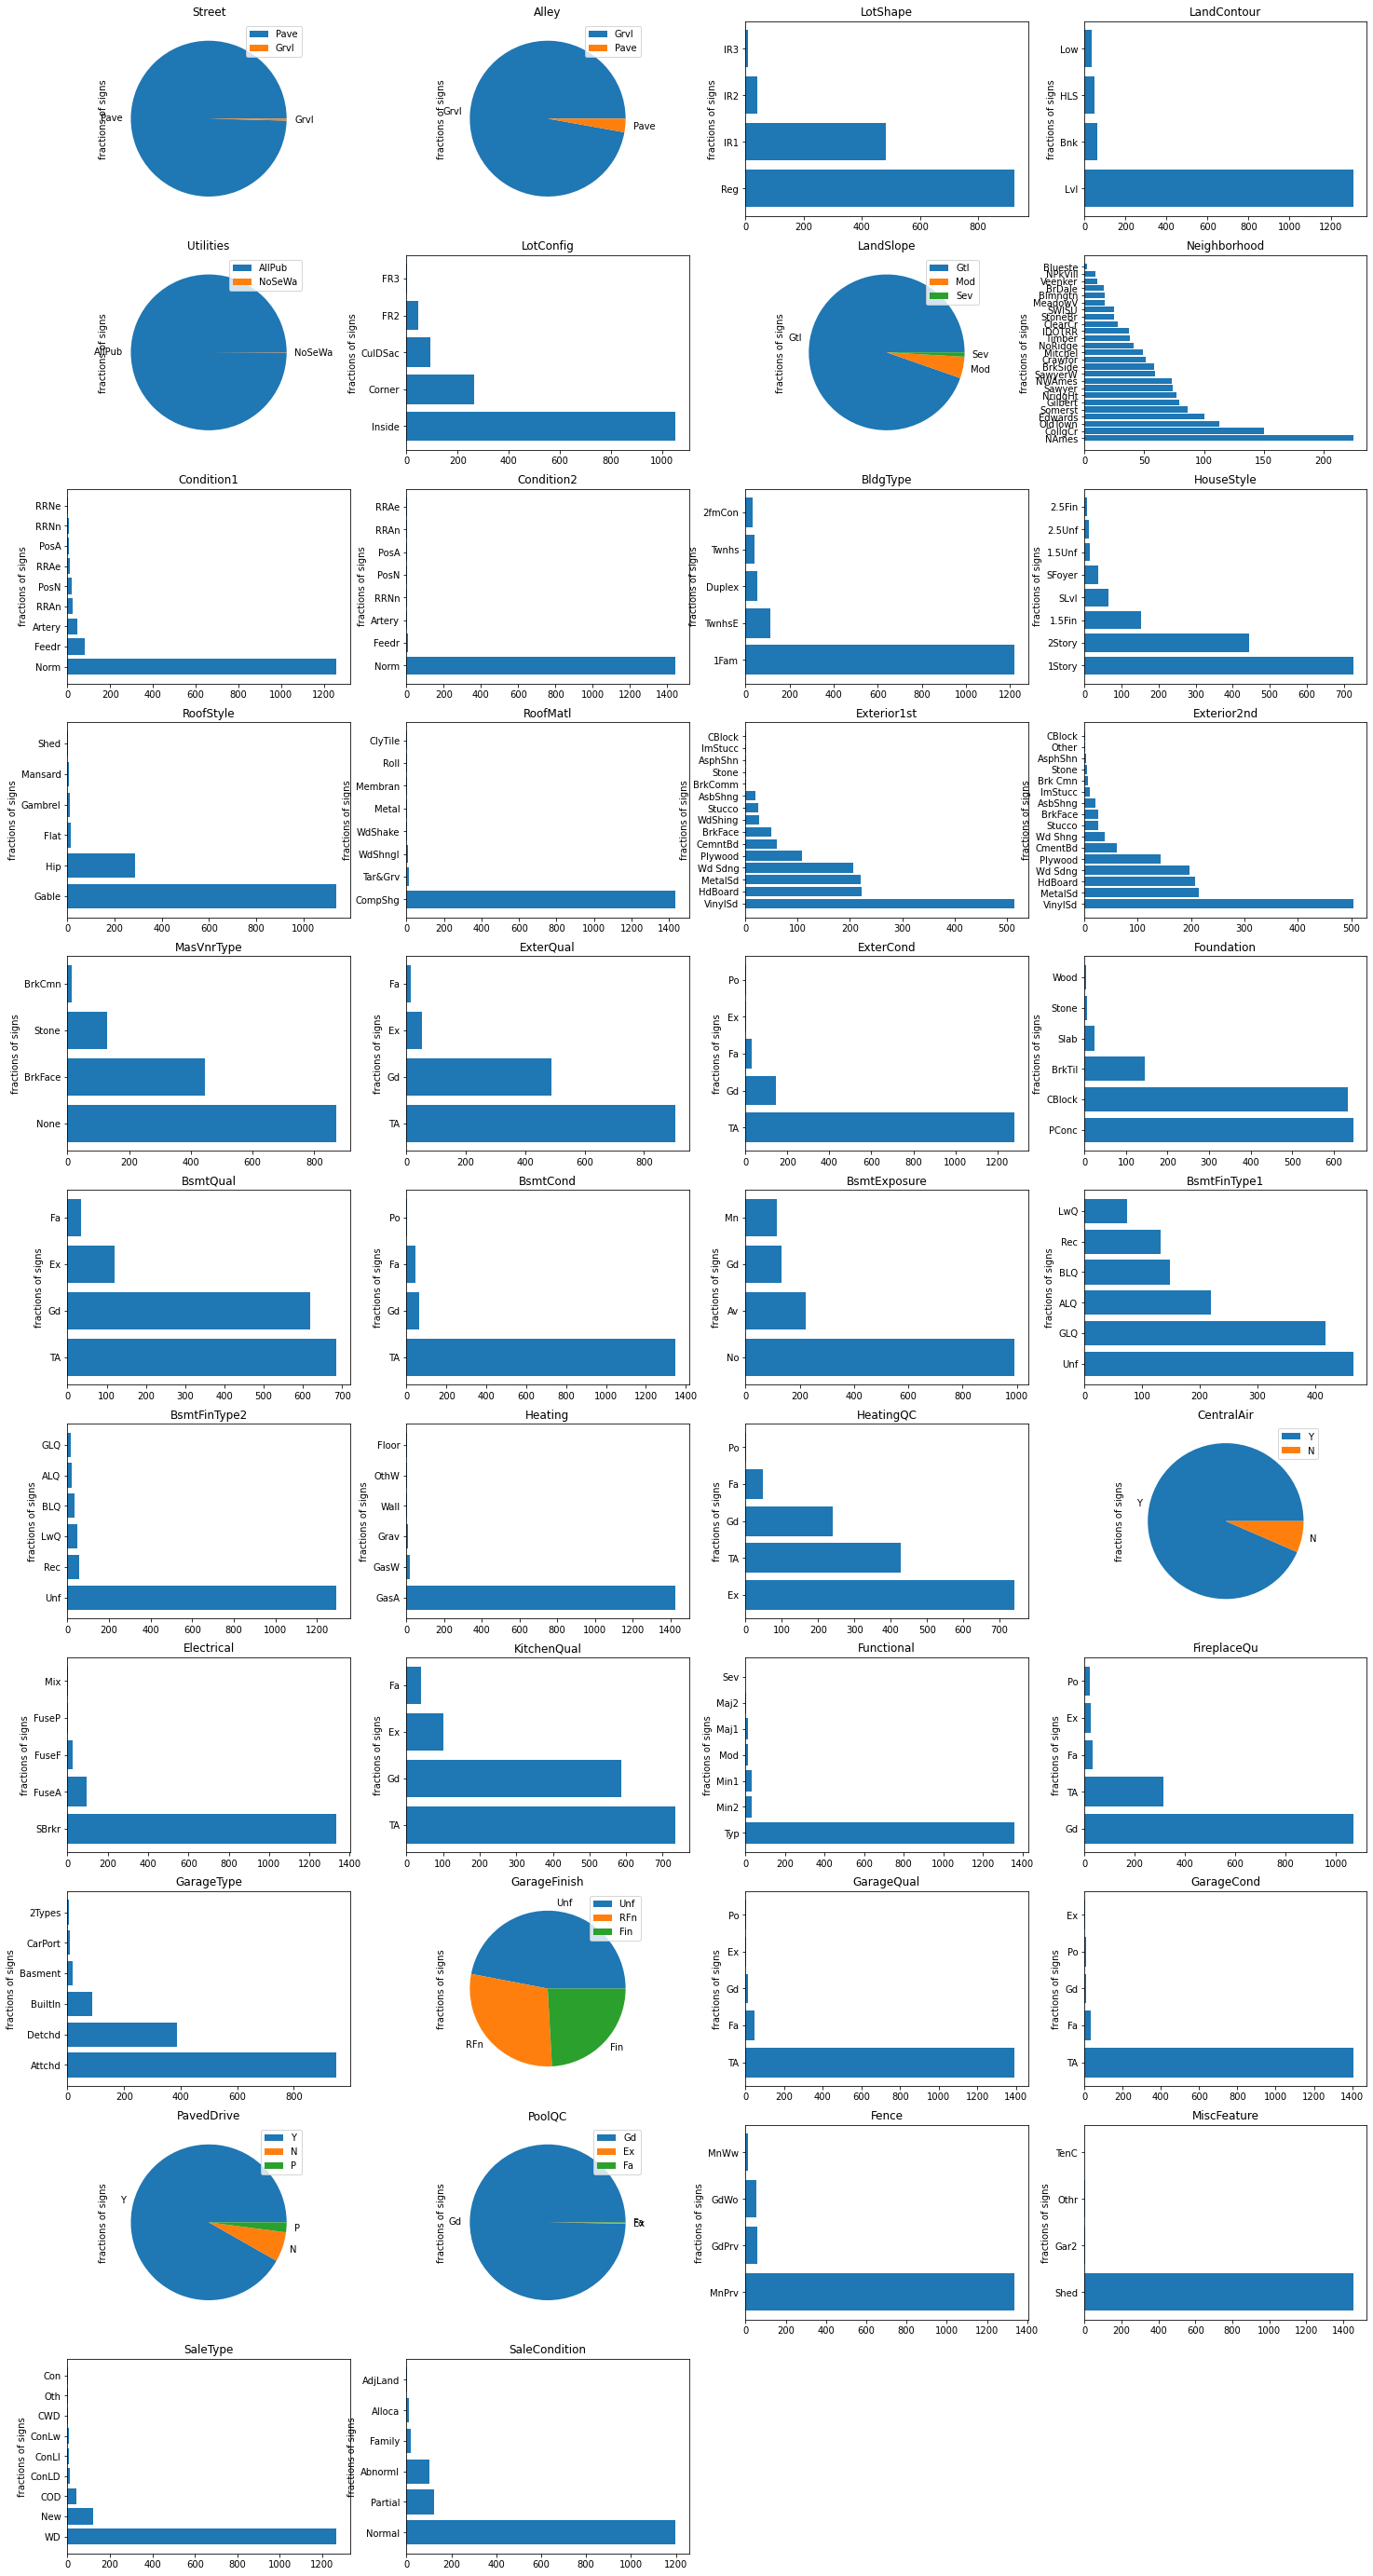

In [ ]:
plt.figure(figsize=(25, 50))
for i in range(1,len(categorical)):
  if len(df[categorical[i]].value_counts())<4:
    plt.subplot(11, 4, i)
    plt.pie(df[categorical[i]].value_counts(), labels = \
           df[categorical[i]].value_counts().keys().tolist())
    plt.title(categorical[i])
    plt.ylabel('fractions of signs')
    plt.legend()
  else:
    plt.subplot(11, 4, i)
    plt.barh(df[categorical[i]].value_counts().keys().tolist(),\
             df[categorical[i]].value_counts().tolist())
    plt.title(categorical[i])
    plt.ylabel('fractions of signs')
plt.show();

#Modeling


In [ ]:
#стандартизируем признаки
ohe = OneHotEncoder(sparse=False)
stdsc = StandardScaler()

In [ ]:
y = df['SalePrice']
x = df[df.drop(columns = ['SalePrice', 'Id']).columns.tolist()]
categ = x.select_dtypes(include=['object'])
num = x.select_dtypes(include=['int64', 'float64'])

In [ ]:
ohe.fit(categ)
x[ohe.get_feature_names_out()] = ohe.transform(categ)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
x = x.drop(columns = categ)

In [ ]:
stdsc.fit(num)
x[stdsc.get_feature_names_out()]  = stdsc.transform(num)

In [ ]:
lasso = Lasso(tol = 0.001 , max_iter=1e7, precompute=True,random_state=42)
linear = LinearRegression()
r_cv = RidgeCV()
gbr = GradientBoostingRegressor(random_state=42)
rfr = RandomForestRegressor(max_depth = 5,min_samples_leaf =  1,\
                            min_samples_split = 2,n_estimators =  100, random_state= 42)


In [ ]:
models = [ linear, r_cv, rfr, lasso, gbr]
scores_model = []
models_s = {}
for m in models:
  score = cross_val_score(m, x, y, cv=5, scoring='neg_root_mean_squared_error')
  scores_model.append(score.mean())
  models_s[score.mean()] = m 
  print(f'Модель {m}, средняя RMSE - {score.mean():.4f} std - {score.std():.4f} ');

Модель LinearRegression(), средняя RMSE - -144630471927149.2812 std - 135281529558540.0625 
Модель RidgeCV(alphas=array([ 0.1,  1. , 10. ])), средняя RMSE - -29124.4228 std - 4966.2611 
Модель RandomForestRegressor(max_depth=5, random_state=42), средняя RMSE - -32848.3754 std - 2790.1889 
Модель Lasso(max_iter=10000000.0, precompute=True, random_state=42, tol=0.001), средняя RMSE - -32846.8376 std - 5632.4313 
Модель GradientBoostingRegressor(random_state=42), средняя RMSE - -25820.7335 std - 3198.0622 


In [ ]:
print(f'Лучшая модель - {models_s[max(scores_model)]}, RMSE -  {max(scores_model)}')

Лучшая модель - GradientBoostingRegressor(random_state=42), RMSE -  -25820.73351904386


In [ ]:
test_set = pd.read_csv('/content/test.csv')

In [ ]:
def delete_col(df):
  data = df.copy()
  return data.drop(columns=[
                            'Alley' , 
                            'FireplaceQu', 
                            'PoolQC', 
                            'Fence', 
                            'MiscFeature'
                            ])

In [ ]:
pipe_num = Pipeline(steps=[
        ('delete_na', SimpleImputer(strategy='median')),
        ('std', StandardScaler())
    ])
pipe_cat = Pipeline(steps=[
        ('delete', SimpleImputer(strategy='most_frequent')),
         ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
         ])

In [ ]:
column_trans = ColumnTransformer([
        ('transform_cat', pipe_cat,\
         make_column_selector(dtype_include=object)),
        ('transform_num', pipe_num, make_column_selector(dtype_include=['int64', 'float64']))
    ])

In [ ]:
head_model = Pipeline(steps=[
            ('delete_columns', FunctionTransformer(delete_col)),
            ('preprocessing', column_trans),
            ('model', gbr)
        ])

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
head_model.fit(
    df.drop(columns = ['Id', 'SalePrice']), 
    df['SalePrice']
)

In [ ]:
test['SalePrice'] = head_model.predict(test)

In [ ]:
answer = test[['Id', 'SalePrice']]

In [ ]:
answer.set_index('Id', inplace=True)

In [ ]:
answer.to_csv('answer.csv')